# Support Vector Machine


Name: Ragunathan E S

Register Number: 2248014

Subject : Machine Learning

Lab: 4

# Objective

To implement SVM in Stroke dataset

To check whether he/she suffers from Stroke.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset

df = pd.read_csv("C:\\Users\\Ragunathan E S\\OneDrive\\Desktop\\ML\\Brain_stroke_dataset\\brain_stroke.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [ ]:
#It gives the complete information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.shape  #It gives Dimension of the data i.e., 4981-rows and 11-columns

(4981, 11)

In [ ]:
#Is to identify the unique values in the data

df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df.isnull().sum()  #no null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.describe()  #Statistical measure

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


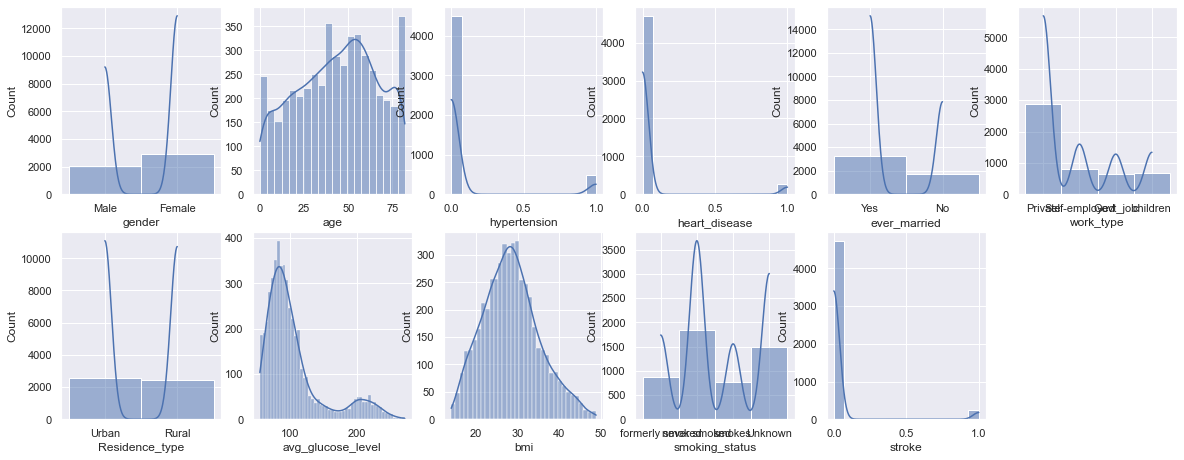

In [ ]:
#Distribution plot

plt.figure(figsize = (20, 20))
sns.set(style="darkgrid")
plotnumber = 1
for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.show()

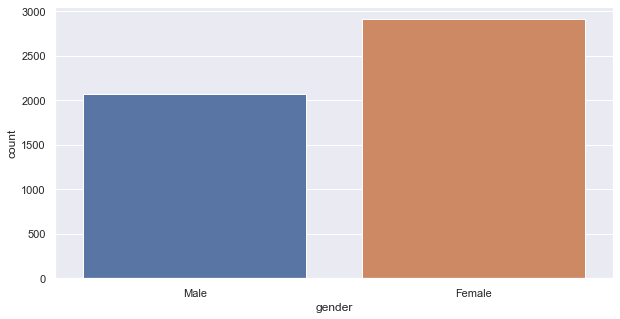

In [ ]:
#Gender

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender');

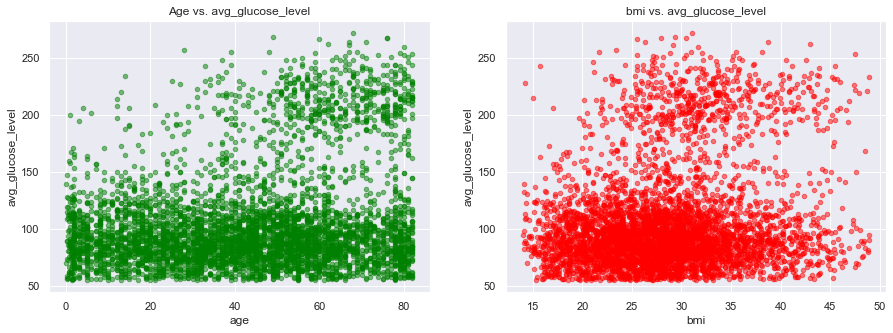

In [ ]:
#Scatter Plot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

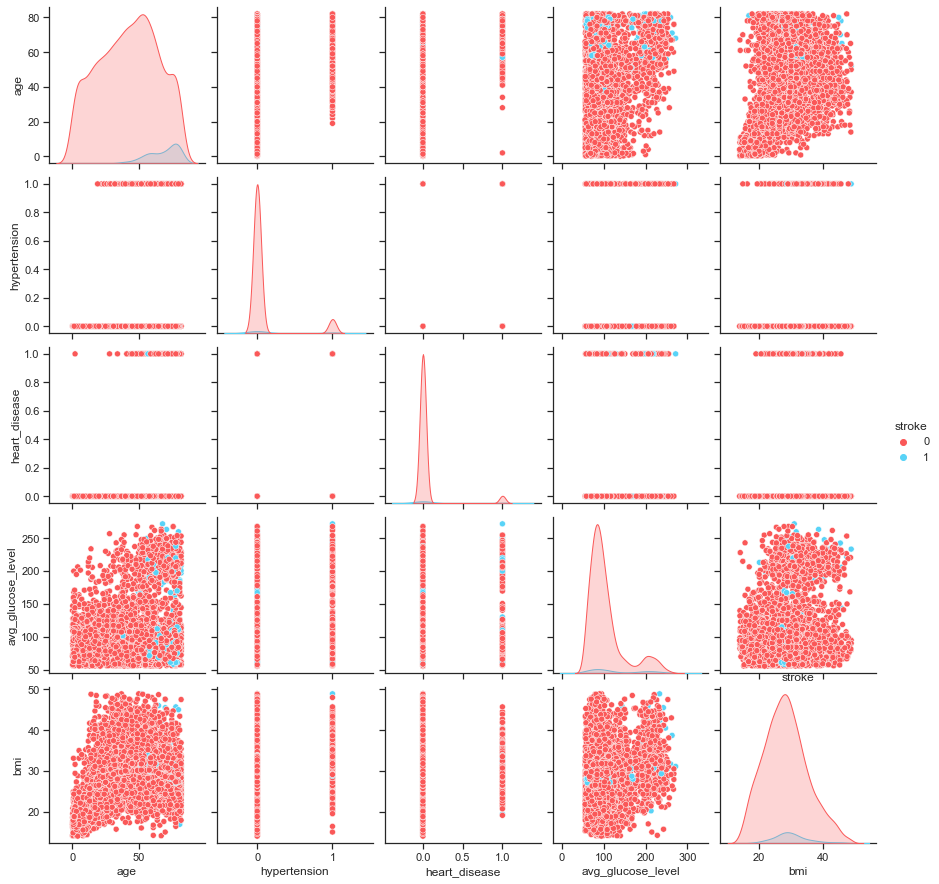

In [ ]:
#Finding stroke for age, hypertension, heart_disease, avg_glucose_level, and bmi.

sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="stroke", palette=pal);
plt.title("stroke");

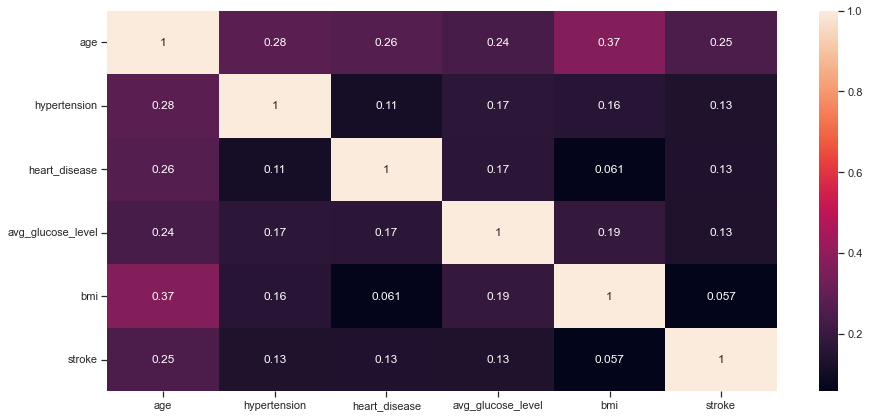

In [ ]:
#Correlation

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

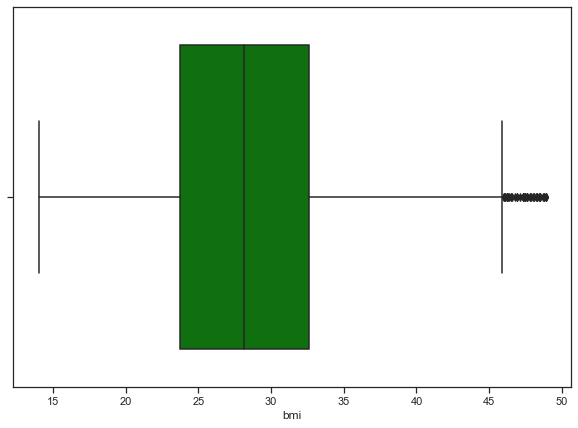

In [ ]:
#Box plot is to identify the outliers.

plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

# Treating the Outliers

In [ ]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(0,)

In [ ]:
# mean with outliers

print(bmi_outliers['stroke'].value_counts())

Series([], Name: stroke, dtype: int64)


In [ ]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
df["bmi"] = df["bmi"].fillna(28.4)

In [ ]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [ ]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2767  140
               Male             1966  108
Residence_type Rural            2336  113
               Urban            2397  135
smoking_status Unknown          1453   47
               formerly smoked   797   70
               never smoked     1749   89
               smokes            734   42

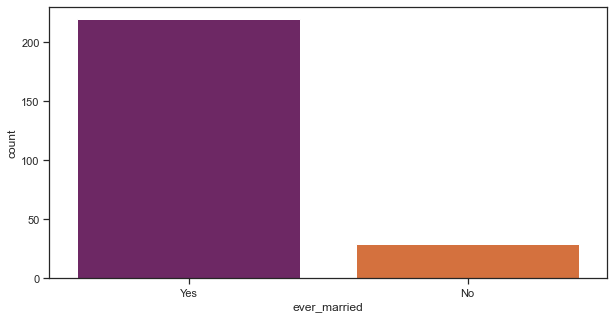

In [ ]:
#Ever_married

plt.figure(figsize=(10,5))
stroke=df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='ever_married',palette='inferno');

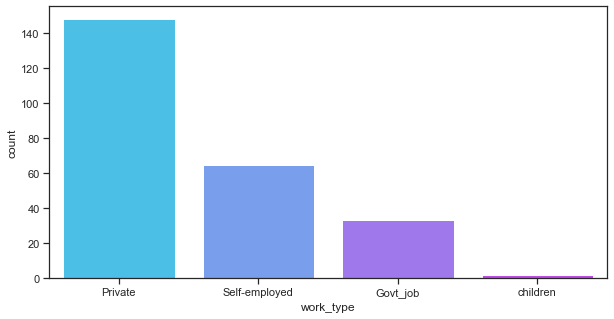

In [ ]:
#Work_type

plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='work_type',palette='cool');

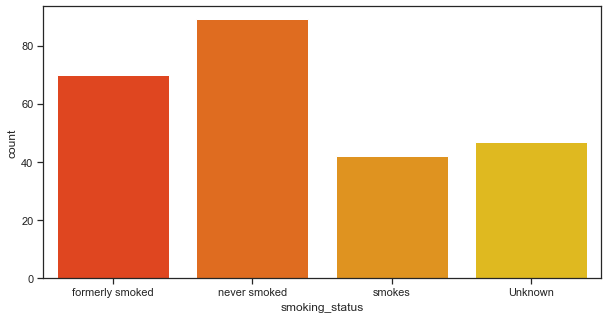

In [ ]:
#Smoking Status

plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='smoking_status',palette='autumn');

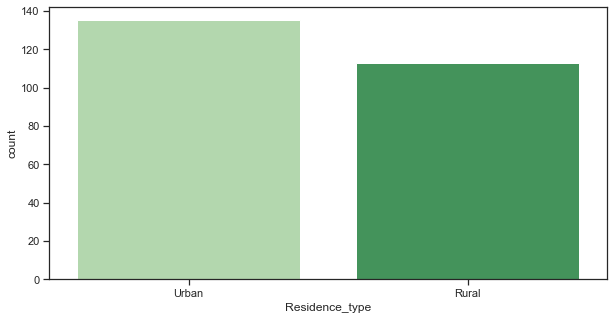

In [ ]:
#Residence type

plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='Residence_type',palette='Greens');


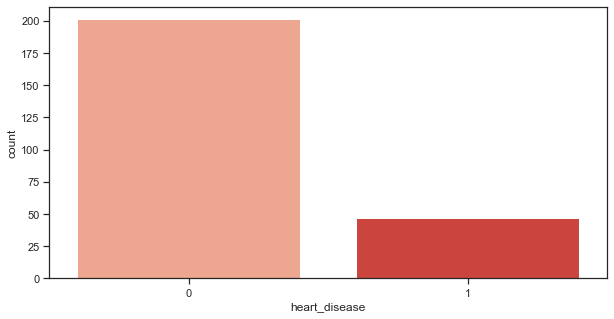

In [ ]:
#Heart disease

plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='heart_disease',palette='Reds');

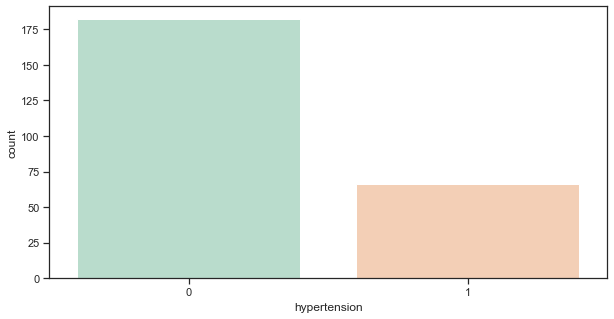

In [ ]:
#Hypertension

plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='hypertension',palette='Pastel2');

In [ ]:
#Encodeing Categorical features

df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)


df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,1,0,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,1,0,0
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,70.15,29.8,0,0,1,0,0,0,1,0,0
4977,1,40.0,0,0,1,1,191.15,31.1,0,0,0,0,1,0,1,0,0
4978,0,45.0,1,0,1,0,95.02,31.8,0,0,0,0,1,1,0,0,0
4979,1,40.0,0,0,1,0,83.94,30.0,0,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling the variance in features

std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,2.723411,1.193238,1.040584
1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,-0.000523,0.589390,1.614270
2,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1.448529,0.869222,0.246250
3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1.512650,-0.662492,1.570141
4,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1.780895,0.073909,1.658400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,0,0,0,0,0,0,1,0,0,0,1,0,0,-0.794162,0.191733,-0.106788
4977,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1.890500,0.383197,-0.150917
4978,0,1,0,1,0,0,0,0,0,1,1,0,0,0,-0.242364,0.486294,0.069731
4979,1,0,0,1,0,0,0,0,0,1,0,1,0,0,-0.488199,0.221189,-0.150917


In [ ]:
df[df.isnull().any(axis=1)]

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age


# Splitting into Features and Target


In [ ]:
X = df.drop(['stroke'], axis=1).values
y = df['stroke'].values

In [ ]:
#train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# SVM

In [ ]:
clf1 = svm.SVC(kernel= 'rbf',C=34, gamma='auto')
clf1.fit(X_train,y_train)
pred1=clf1.predict(X_test)

In [ ]:
#Calculating the accuracy

from sklearn.metrics import accuracy_score
accuracy_score(pred1,y_test)

0.9458375125376128

<AxesSubplot:>

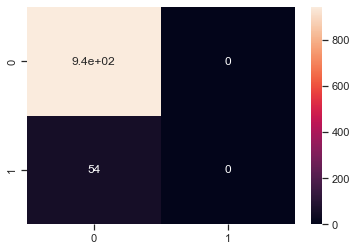

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,pred1)
dataframe_conf_matrix = conf_matrix
sns.heatmap(dataframe_conf_matrix, annot=True)

In [ ]:
# Classification Report

from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred1)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



# Conclusion

In [ ]:
It helps us to find the people those who have stroke. We got the accuracy of 94% by using SVM.